In [55]:
import requests
import time
import tqdm
import pandas as pd
import os
import json
import openpyxl 
from pathlib import Path
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
fp_data = Path.cwd() / "data" 
Path.mkdir(fp_data, exist_ok=True)  
print(fp_data)

C:\Users\Bruger\OneDrive\Dokumenter\GitHub\isds2023\assignments\Exam project\data


In [41]:
def construct_link(table_id, variables):
    base = f'https://api.statbank.dk/v1/data/{table_id}/JSONSTAT?lang=en'
    
    for var in variables:
        base += f'&{var}'

    return base 

construct_link('MPK3', ['Tid=*', 'Type=5500602011'])

'https://api.statbank.dk/v1/data/MPK3/JSONSTAT?lang=en&Tid=*&Type=5500602011'

In [42]:
#API FOR loan interest rate 
#It refers to the interest rate that banks and financial institutions charge for lending money to individuals, businesses, and other institutions.
url = construct_link('MPK3', ['Tid=*', 'Type=5500602011'])

def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    data = dict(zip(years, values))
    return data

Interest_rate = create_data(url)

interest_rate_df = pd.DataFrame(Interest_rate.items(), columns=['Year', 'Loan interest rate']).dropna()
    

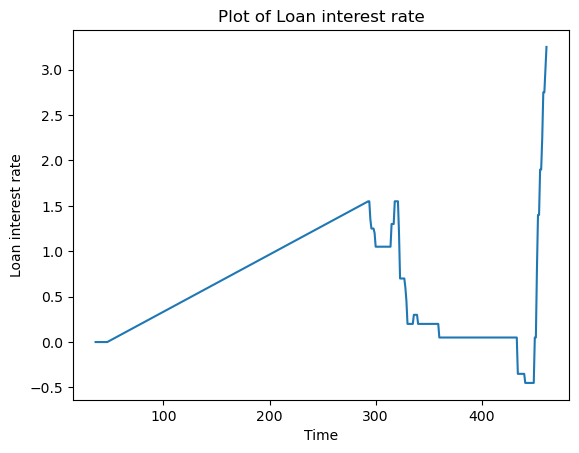

In [57]:
interest_rate_df['Loan interest rate'].plot()
plt.title("Plot of Loan interest rate")
plt.xlabel("Time")
plt.ylabel("Loan interest rate")
plt.show()

In [43]:
#API for consumer price index 
url = construct_link('PRIS111', ['Tid=*', 'VAREGR=000000', 'Enhed=100'])

def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    data = dict(zip(years, values))
    return data

Consumer_price_index = create_data(url)
Consumer_price_index_df = pd.DataFrame(Consumer_price_index.items(), columns=['Year', 'Consumer Price Index']).dropna()

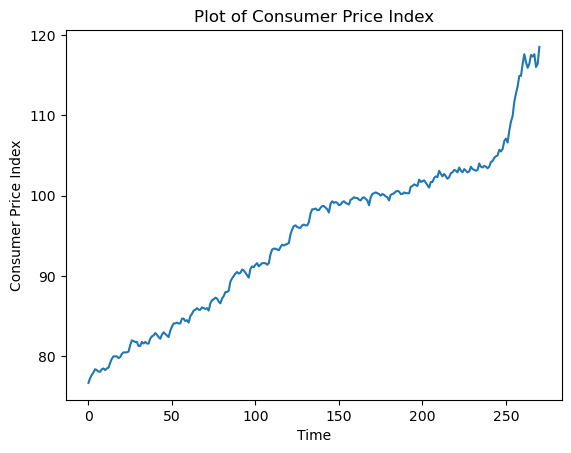

In [58]:
Consumer_price_index_df['Consumer Price Index'].plot()
plt.title("Plot of Consumer Price Index")
plt.xlabel("Time")
plt.ylabel("Consumer Price Index")
plt.show()

In [59]:
#"Net Price Index." This index measures the change in the prices of goods and services excluding taxes, tariffs, and subsidies. 
#It focuses on the underlying price changes of products and services before the impact of government policies, 
#such as taxes and subsidies, is taken into account. 

url = construct_link('PRIS116', ['Tid=*', 'Type=*'])

def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    data = dict(zip(years, values))
    return data

net_price_index = create_data(url)
# Create a DataFrame
net_price_index_df = pd.DataFrame(net_price_index.items(), columns=['Year', 'net price index']).dropna()

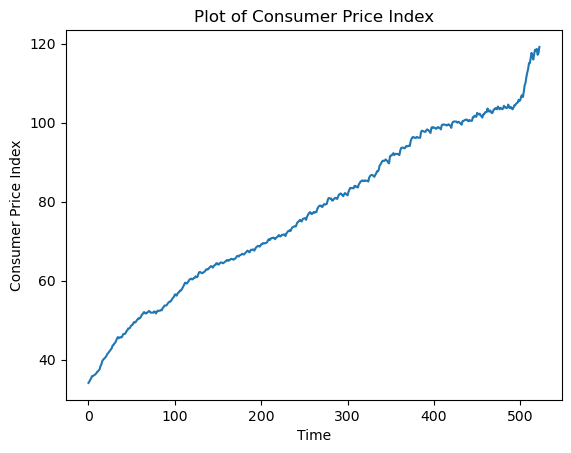

In [60]:
net_price_index_df['net price index'].plot()
plt.title("Plot of Consumer Price Index")
plt.xlabel("Time")
plt.ylabel("Consumer Price Index")
plt.show()

In [45]:
#API for salary (this one is quarterly) 
#Standardised index of average earnings (2016=100) 

url = construct_link('SBLON1', ['Tid=*', 'BRANCHE07=*', 'VARIA1=100', 'SEKTOR=1000'])
def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    data = dict(zip(years, values))
    return data

salary_data = create_data(url)

# Create a DataFrame
salary_df = pd.DataFrame(salary_data.items(), columns=['Year', 'Salary']).dropna()



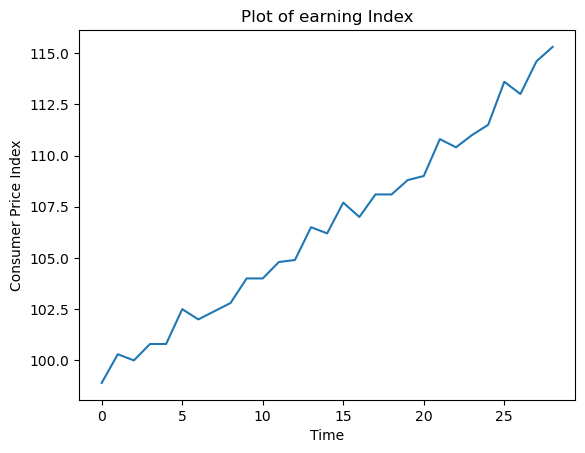

In [62]:
salary_df['Salary'].plot()
plt.title("Plot of earning Index")
plt.xlabel("Time")
plt.ylabel("Consumer Price Index")
plt.show()


In [64]:
#API for GDP (are we in an economic boom --> could maybe create a binary variable with a yes or no) 
#chose to use chained values because account for changes in price levels over time, making them suitable for comparing economic 
#data across different time periods while adjusting for inflation or deflation. This is important because GDP and housing prices 
#can be affected by changes in the general price level, and using chained values helps to isolate the real changes in these variables.

url = construct_link('NKN1', ['Tid=*', 'S%C3%86SON=*', 'PRISENHED=LKV_M', 'TRANSAKT=B1GQK'])

def create_data(url):
    response = requests.get(url).json()
    values = response['dataset']['value']
    years = response['dataset']['dimension']['Tid']['category']['index']
    data = dict(zip(years, values))
    return data

gdp= create_data(url)
gdp_df = pd.DataFrame(gdp.items(), columns=['Year', 'GDP']).dropna()

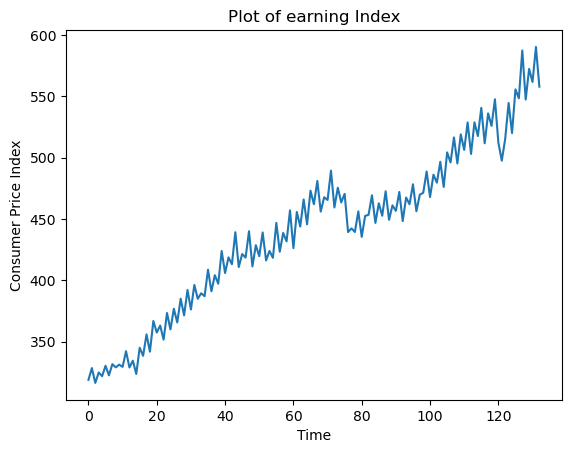

In [66]:
gdp_df['GDP'].plot()
plt.title("Plot of earning Index")
plt.xlabel("Time")
plt.ylabel("Consumer Price Index")
plt.show()